Dataset Preview:

       Weight  Diameter  Color  Sweetness   Label
0  189.878047  7.936659      4   4.710039    Pear
1  176.727317  6.551557      4   5.945705    Pear
2  239.350226  8.959484      5   8.832882   Mango
3  192.875820  7.873335      3   7.765454  Orange
4  141.658851  4.693613      2   9.368632  Banana
5  190.028305  7.335147      4   6.529804    Pear
6  159.279899  7.501766      1   7.361636   Apple
7  197.298823  6.664178      4   5.203105    Pear
8  204.862495  8.134928      3   6.096996  Orange
9  150.094637  6.716851      1   7.099651   Apple

Dataset Summary:

           Weight    Diameter       Color   Sweetness
count  300.000000  300.000000  300.000000  300.000000
mean   178.903325    7.223187    3.000000    7.261883
std     34.239705    1.555917    1.416576    1.569540
min    102.376946    3.862831    1.000000    3.349030
25%    155.003946    6.596561    2.000000    6.116552
50%    179.087201    7.674086    3.000000    7.159702
75%    207.108641    8.387936    4.

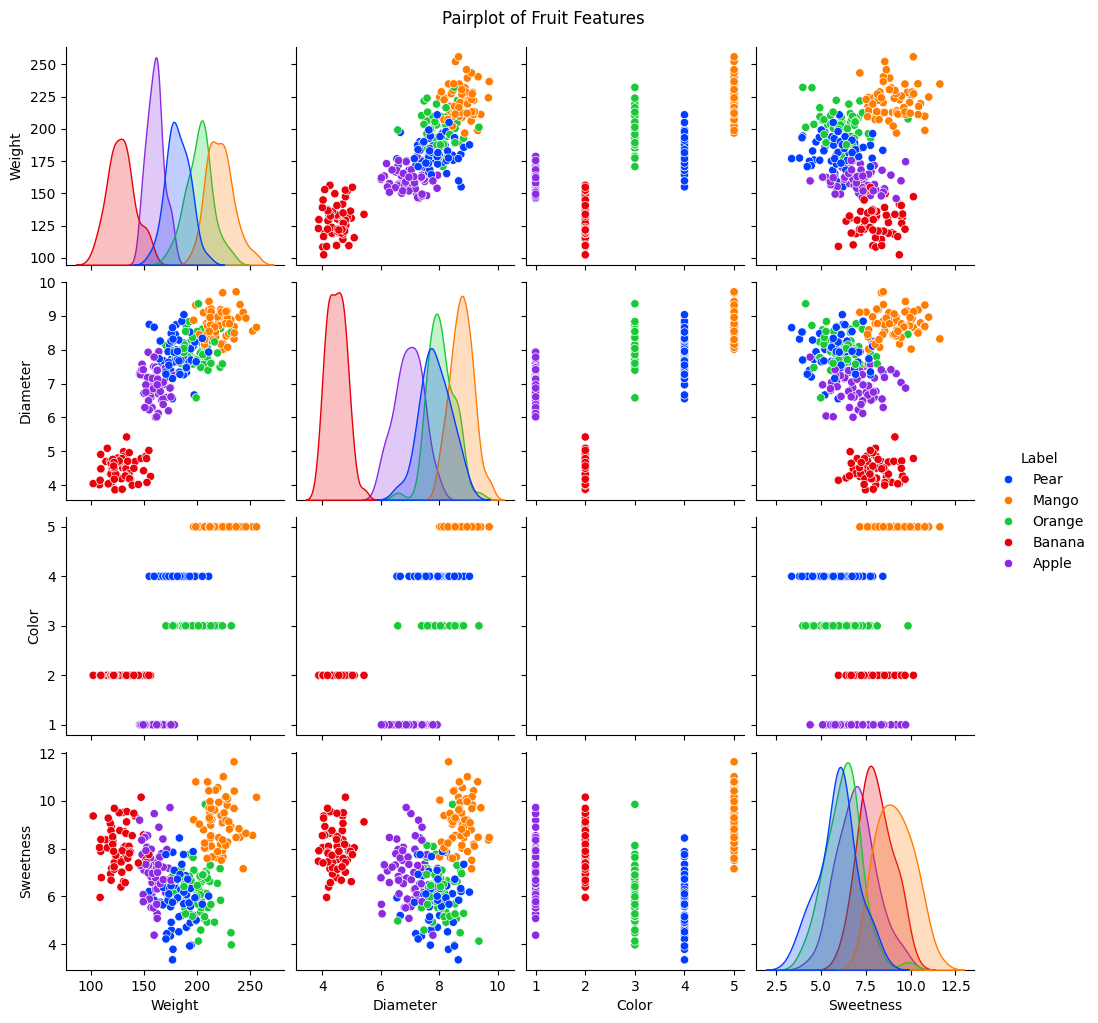

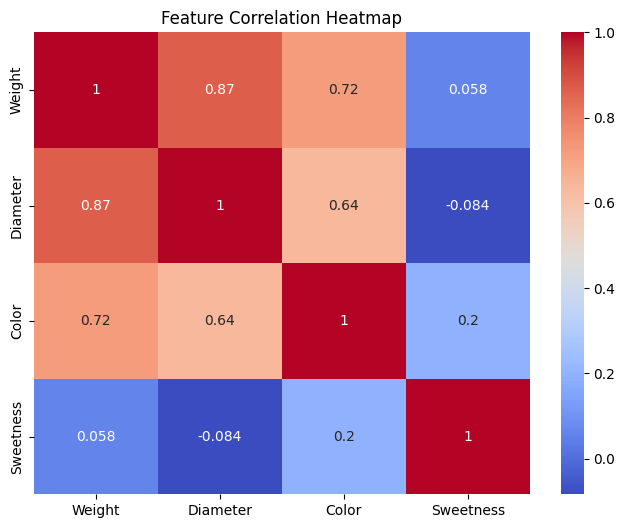


Training Samples per Class:
Apple: 42 samples
Banana: 42 samples
Mango: 42 samples
Orange: 42 samples
Pear: 42 samples

Model training completed successfully!

K-Fold Cross-Validation Results:
Scores: [1.     0.9286 1.     1.     1.    ]
Mean Accuracy: 0.9857

Test Accuracy: 100.00%

Confusion Matrix:
 [[18  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 18]]

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      1.00      1.00        18
       Mango       1.00      1.00      1.00        18
      Orange       1.00      1.00      1.00        18
        Pear       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



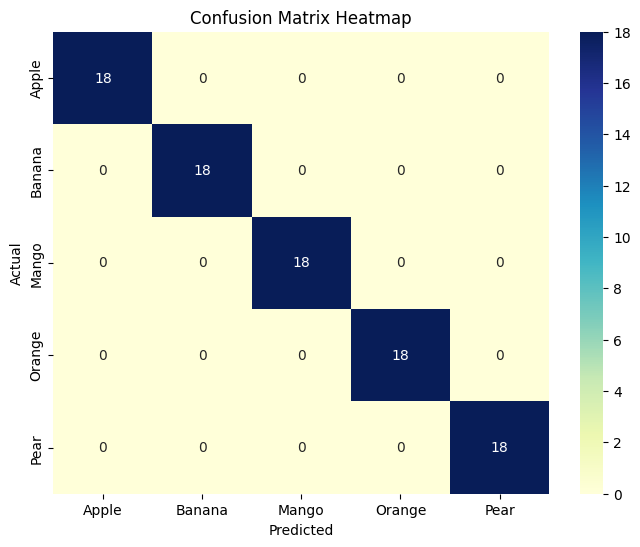

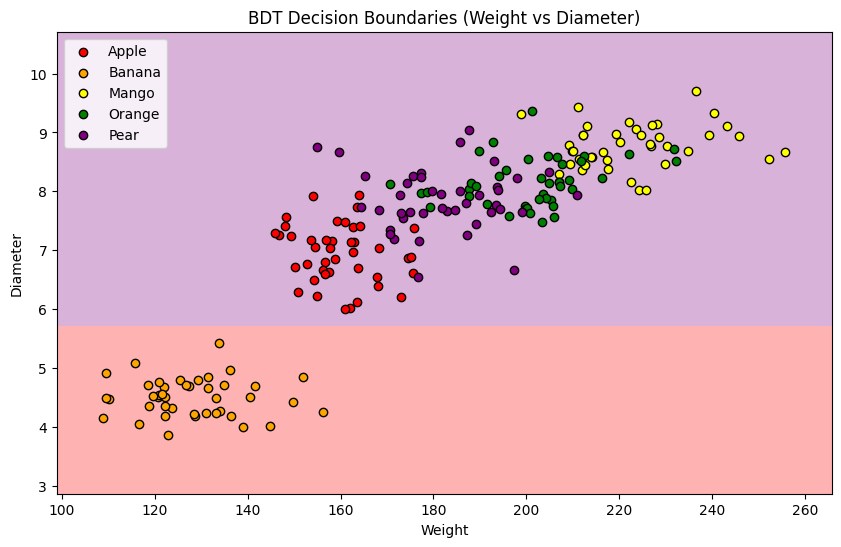

/tmp/ipython-input-452816526.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weight','Diameter','Color','Sweetness'], y=importances, palette='viridis')


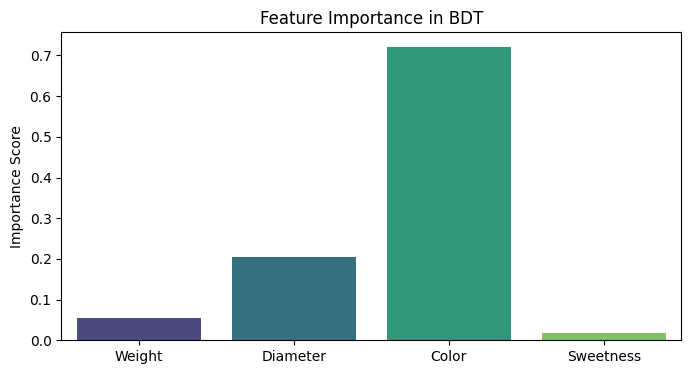

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as mcolors

# For reproducibility
np.random.seed(42)
pd.set_option('display.max_columns', None)


n_samples = 60  # number of samples per fruit

fruits = {
    'Apple':   {'weight': (160, 10), 'diameter': (7.0, 0.5), 'color': 1, 'sweetness': (7, 1)},
    'Orange':  {'weight': (200, 15), 'diameter': (8.2, 0.5), 'color': 3, 'sweetness': (6, 1)},
    'Banana':  {'weight': (130, 12), 'diameter': (4.5, 0.3), 'color': 2, 'sweetness': (8, 1)},
    'Pear':    {'weight': (180, 12), 'diameter': (7.9, 0.5), 'color': 4, 'sweetness': (6, 1)},
    'Mango':   {'weight': (220, 14), 'diameter': (8.7, 0.4), 'color': 5, 'sweetness': (9, 1)}
}

data = []
for fruit, params in fruits.items():
    for _ in range(n_samples):
        weight = np.random.normal(params['weight'][0], params['weight'][1])
        diameter = np.random.normal(params['diameter'][0], params['diameter'][1])
        color = params['color']
        sweetness = np.random.normal(params['sweetness'][0], params['sweetness'][1])
        data.append([weight, diameter, color, sweetness, fruit])

df = pd.DataFrame(data, columns=['Weight', 'Diameter', 'Color', 'Sweetness', 'Label'])

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
print("Dataset Preview:\n")
print(df.head(10))


print("\nDataset Summary:\n")
print(df.describe())

print("\nClass Distribution:\n")
print(df['Label'].value_counts())

sns.pairplot(df, hue='Label', diag_kind='kde', palette='bright')
plt.suptitle("Pairplot of Fruit Features", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Label', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


encoder = LabelEncoder()
df['Label_Code'] = encoder.fit_transform(df['Label'])
class_labels = encoder.classes_

X = df[['Weight', 'Diameter', 'Color', 'Sweetness']].values
y = df['Label_Code'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining Samples per Class:")
for c in np.unique(y_train):
    print(f"{class_labels[c]}: {(y_train==c).sum()} samples")


model = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)
model.fit(X_train, y_train)

print("\nModel training completed successfully!")


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross-Validation Results:")
print("Scores:", np.round(cv_scores, 4))
print("Mean Accuracy:", np.mean(cv_scores).round(4))


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

report = classification_report(y_test, y_pred, target_names=class_labels)
print("\nClassification Report:\n", report)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


feature_indices = [0, 1]  # Weight and Diameter
x_min, x_max = X_train[:, feature_indices[0]].min() - 10, X_train[:, feature_indices[0]].max() + 10
y_min, y_max = X_train[:, feature_indices[1]].min() - 1, X_train[:, feature_indices[1]].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

mean_color = np.mean(X_train[:, 2])
mean_sweetness = np.mean(X_train[:, 3])
grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, mean_color), np.full(xx.ravel().shape, mean_sweetness)]

Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
colors = ['red', 'orange', 'yellow', 'green', 'purple']
cmap = mcolors.ListedColormap(colors[:len(class_labels)])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

for c in np.unique(y_train):
    plt.scatter(X_train[y_train==c][:,feature_indices[0]],
                X_train[y_train==c][:,feature_indices[1]],
                color=colors[c], edgecolor='k', label=class_labels[c])

plt.xlabel("Weight")
plt.ylabel("Diameter")
plt.title("BDT Decision Boundaries (Weight vs Diameter)")
plt.legend()
plt.show()


importances = model.feature_importances_
plt.figure(figsize=(8,4))
sns.barplot(x=['Weight','Diameter','Color','Sweetness'], y=importances, palette='viridis')
plt.title("Feature Importance in BDT")
plt.ylabel("Importance Score")
plt.show()
